### Challenge Description

Energy consumption in buildings and industry is often wasted due to user behaviour, human error, and poorly performing equipment. In this context, identifying abnormal consumption power behavior can be an important part of reducing peak energy consumption and changing undesirable user behavior. With the widespread rollouts of smart meters, normal operating consumption can be learned over time and used to identify or flag abnormal consumption. Such information can help indicate to users when their equipment is not operating as normal and can help to change user behavior or to even indicate what the problem appliances may be to implement lasting changes.

This challenge is looking for data scientists to apply their skills to an anomaly detection problem using smart meter data. Ideally, such an algorithm should begin to operate after as little as 3 months and should improve over time. A platform to visualise the anomalies would also be useful. Users can select any type of machine learning algorithms that they wish to in order to detect the anomalies from the data.

### Data
A sample including smart meter data can be found on [kaggle](https://www.kaggle.com/portiamurray/anomaly-detection-smart-meter-data-sample). Participants are encouraged to find other smart meter data to work with in order to test their algorithms.

### Imports

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import random
from datetime import datetime, timedelta
import collections as cl

### Load file to 'data' dataframe

In [3]:
data = pd.read_excel('data/Lastgang Elektroverbruche 160101-170511.xlsx')
data.columns = ['datetime', 'kWh']
data = data.set_index('datetime')
data.head()

,kWh
datetime,
2016-01-01 00:15:00,2.85
2016-01-01 00:30:00,2.85
2016-01-01 00:45:00,3.00
2016-01-01 01:00:00,2.94
2016-01-01 01:15:00,2.79


In [4]:
data = data[~data.index.duplicated(keep='first')] # there are 4 entries with the same timestamp

In [5]:
data.iloc[-1]

kWh    3.57
Name: 2017-05-11 00:00:00, dtype: float64

### How to with timestamps

In [6]:
# how to get a timestamp from string
datetime.fromisoformat('2016-01-01 00:15:00')
# how to add 90 days to a specific time
datetime.fromisoformat('2016-01-01 00:15:00') + timedelta(days=90)

datetime.datetime(2016, 3, 31, 0, 15)

In [7]:
from datetime import datetime, timedelta

def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta
# generate timestamps for the whole period: starting on 01.01.2016, ending on 10.05.2017 
dt = [dt for dt in 
       datetime_range(datetime(2016, 1, 1, 0, 15), datetime(2017, 5, 10, 23, 55), 
       timedelta(minutes=15))]

print(len(dt))

47615


In [8]:
df = pd.DataFrame(dt)
df.columns = ['datetime']
df['kWh'] = np.nan
df = df.set_index('datetime')
df.head()

,kWh
datetime,
2016-01-01 00:15:00,NaN
2016-01-01 00:30:00,NaN
2016-01-01 00:45:00,NaN
2016-01-01 01:00:00,NaN
2016-01-01 01:15:00,NaN


In [9]:
for index,row in df.iterrows():
    if index in data.index:
        df.loc[index]['kWh'] = data.loc[index]['kWh']
    else:
        print('Missing value at ', index)

Missing value at  2016-03-27 02:00:00
Missing value at  2016-03-27 02:15:00
Missing value at  2016-03-27 02:30:00
Missing value at  2016-03-27 02:45:00
Missing value at  2016-11-10 01:45:00
Missing value at  2017-02-24 00:00:00
Missing value at  2017-02-24 00:15:00
Missing value at  2017-02-24 00:30:00
Missing value at  2017-02-24 00:45:00
Missing value at  2017-02-24 01:00:00
Missing value at  2017-02-24 01:15:00
Missing value at  2017-02-24 01:30:00
Missing value at  2017-02-24 01:45:00
Missing value at  2017-02-24 02:00:00
Missing value at  2017-02-24 02:15:00
Missing value at  2017-02-24 02:30:00
Missing value at  2017-02-24 02:45:00
Missing value at  2017-02-24 03:00:00
Missing value at  2017-02-24 03:15:00
Missing value at  2017-02-24 03:30:00
Missing value at  2017-02-24 03:45:00
Missing value at  2017-02-24 04:00:00
Missing value at  2017-02-24 04:15:00
Missing value at  2017-02-24 04:30:00
Missing value at  2017-02-24 04:45:00
Missing value at  2017-02-24 05:00:00
Missing valu

In [10]:
df.head()

,kWh
datetime,
2016-01-01 00:15:00,2.85
2016-01-01 00:30:00,2.85
2016-01-01 00:45:00,3.00
2016-01-01 01:00:00,2.94
2016-01-01 01:15:00,2.79


In [11]:

df['freq'] = 0
df['anomaly'] = 0
appr = cl.defaultdict(float)
count = 0
alert_threshold = 0.0005

for index, row in df.iterrows():
    val = row['kWh']
    if pd.isna(val):
        print('Missing value at ', index)
        df.loc[index,'anomaly']= 1
    else:
        count += 1
        if val in appr:
            appr[val] += 1
        else:
            appr[val] = 1
        df.loc[index,'freq'] = appr[val]/count
        if df.loc[index,'freq'] < alert_threshold:
            print('Anomolous value at ', index)
            df.loc[index,'anomaly']= 1

Anomolous value at  2016-01-23 02:00:00
Anomolous value at  2016-01-23 03:15:00
Anomolous value at  2016-01-23 11:15:00
Anomolous value at  2016-01-26 07:45:00
Anomolous value at  2016-01-28 18:00:00
Anomolous value at  2016-01-29 07:30:00
Anomolous value at  2016-02-14 04:15:00
Anomolous value at  2016-02-14 12:45:00
Anomolous value at  2016-02-16 14:45:00
Anomolous value at  2016-03-05 09:30:00
Anomolous value at  2016-03-14 10:30:00
Anomolous value at  2016-03-14 11:00:00
Anomolous value at  2016-03-14 11:15:00
Anomolous value at  2016-03-14 14:15:00
Anomolous value at  2016-03-14 14:30:00
Missing value at  2016-03-27 02:00:00
Missing value at  2016-03-27 02:15:00
Missing value at  2016-03-27 02:30:00
Missing value at  2016-03-27 02:45:00
Anomolous value at  2016-05-24 09:15:00
Anomolous value at  2016-09-05 11:15:00
Anomolous value at  2016-09-07 10:00:00
Anomolous value at  2016-09-19 15:00:00
Anomolous value at  2016-09-20 10:00:00
Anomolous value at  2016-09-25 13:45:00
Anomolou

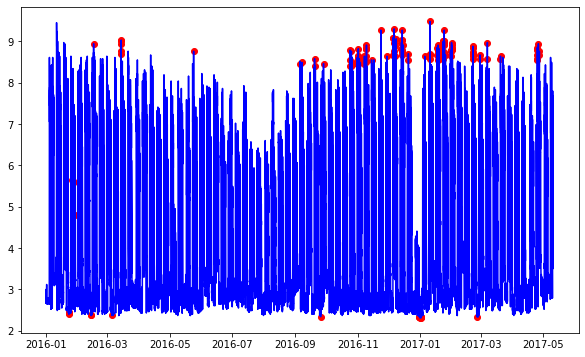

In [12]:
plotdf = df.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
a = plotdf.loc[plotdf['anomaly'] == 1, ['datetime', 'kWh']] #anomaly
ax.plot(plotdf['datetime'], plotdf['kWh'], color='blue')
ax.scatter(a['datetime'], a['kWh'], color='red')
plt.show();

In [13]:
df[df['anomaly'] == 1]

,kWh,freq,anomaly
datetime,,,
2016-01-23 02:00:00,2.46,0.000472,1
2016-01-23 03:15:00,2.43,0.000471,1
2016-01-23 11:15:00,2.40,0.000464,1
2016-01-26 07:45:00,5.64,0.000411,1
2016-01-28 18:00:00,5.61,0.000375,1
...,...,...,...
2017-04-26 09:30:00,8.76,0.000238,1
2017-04-26 11:00:00,8.67,0.000368,1
2017-04-26 11:15:00,8.94,0.000108,1


In [15]:
import pickle

pretrained_freqs = open("pretrained_freqs.pkl", "wb")
pickle.dump(appr, pretrained_freqs)
pretrained_freqs.close()

In [17]:
pretrained_freqs = open("pretrained_freqs.pkl", "rb")
output = pickle.load(pretrained_freqs)
print(output)

defaultdict(<class 'float'>, {2.85: 585, 3.0: 431, 2.94: 453, 2.79: 637, 2.7: 1021, 2.73: 937, 2.67: 1026, 2.76: 784, 3.06: 483, 3.09: 431, 3.12: 452, 2.88: 634, 2.64: 1160, 3.99: 117, 4.14: 129, 4.56: 115, 5.13: 97, 5.82: 122, 6.75: 179, 7.17: 164, 7.5: 125, 8.19: 52, 8.16: 74, 8.28: 68, 8.49: 28, 8.61: 31, 8.43: 35, 8.07: 82, 7.95: 85, 7.59: 125, 7.11: 191, 7.05: 190, 7.44: 141, 7.2: 193, 7.68: 125, 7.86: 90, 7.83: 107, 7.74: 113, 7.71: 134, 7.89: 104, 7.38: 150, 7.56: 129, 6.96: 159, 6.09: 117, 5.55: 94, 5.94: 111, 5.7: 96, 5.16: 88, 5.31: 71, 4.71: 84, 4.59: 132, 4.26: 125, 4.65: 109, 4.29: 145, 3.81: 200, 3.57: 348, 3.6: 305, 3.54: 376, 3.63: 250, 3.51: 405, 3.48: 385, 2.91: 589, 3.36: 411, 4.2: 150, 4.23: 152, 4.95: 80, 5.22: 92, 6.45: 185, 6.63: 178, 8.04: 79, 8.4: 39, 8.1: 76, 7.41: 121, 7.47: 143, 7.92: 108, 7.23: 173, 6.66: 172, 6.54: 167, 6.81: 166, 7.35: 142, 7.29: 148, 7.65: 126, 6.9: 160, 6.33: 155, 5.25: 82, 5.07: 96, 4.68: 116, 3.9: 150, 4.05: 131, 3.93: 135, 3.33: 424,